#### Experiment run 12.4.14. 
#### Rational:
Imaging from muscles that co-expressed Gcamp 6f and td tomato showed negative correlations with right(imaged) wingstroke amplitude in the B2 muscle. Since this was unexpected and different from a group of flies only expressing Gcamp6 it suggested a potential artifact of tdTomato expression. 

This hypothesis was tested by imaging from these flies in the tdTomato channel (Chroma filter set 49008). Four flies were imaged: Fly#s 297,298,299,300. A #8 nd filter was used on the excitation beam path and a #16 filter was placed in the emmision path so that the power density incedent on the fly (2.2 mW/xxmm^2) was on the same order of mag. as that used during Gcamp imaging (2.2 mW/xxmm^2).   

In [9]:
%pylab

Using matplotlib backend: WXAgg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [1]:
import flylib
import db_access as dba
fly_db = dba.get_db()
swarm = flylib.Squadron(fly_db,[297,298,299,300])

In [20]:
def wing_correlations(sig,imgs,fly = None):
    #calculate some summary images including the correlation image
    mean_img = mean(imgs,axis=0)
    zeroed_img = imgs - mean_img
    max_img = np.max(imgs,axis = 0)
    norm_img = numpy.linalg.norm(zeroed_img,axis = 0)
    norm_sig = numpy.linalg.norm(sig-np.mean(sig))
    dot_img = sum(zeroed_img*(sig[:,newaxis,newaxis]-np.mean(sig)),axis = 0)
    corr_img = dot_img/(norm_img*norm_sig)
    return {'mean_img':mean_img,
        'max_img':max_img,
        'norm_img':norm_img,
        'dot_img':dot_img,
        'corr_img':corr_img}

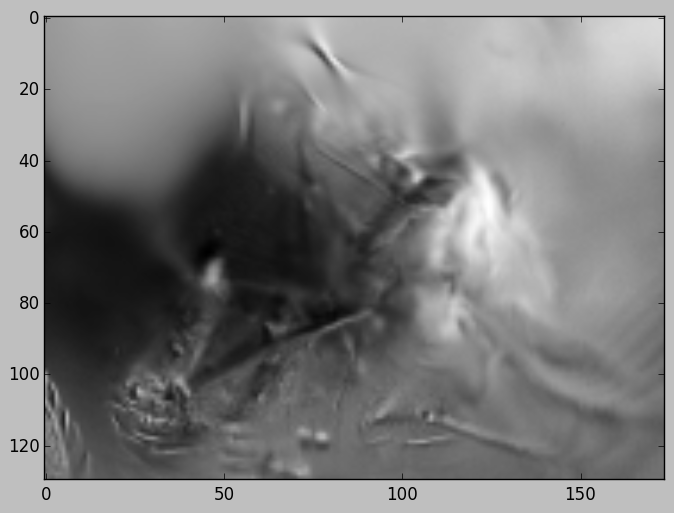

In [38]:
exp = swarm.flies[0].experiments.values()[0]
lwing = array(exp.exp_record['tiff_data']['axon_framebase']['Ph0'])
rwing = array(exp.exp_record['tiff_data']['axon_framebase']['Ph1'])
lmr = array(exp.exp_record['tiff_data']['axon_framebase']['Ph2'])
imgs = array(exp.exp_record['tiff_data']['images'])
fsig = array(exp.exp_record['tiff_data']['axon_framebase']['Ph3'])
fmask = fsig<6.0
cdict = wing_correlations(rwing[fmask],imgs[fmask])
imshow(cdict['corr_img'],cmap = cm.gray)
display(gcf())

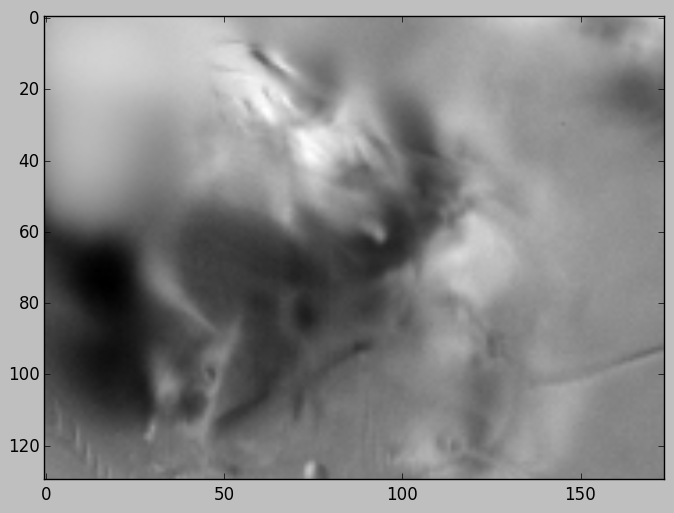

In [61]:
exp = swarm.flies[1].experiments.values()[0]
lwing = array(exp.exp_record['tiff_data']['axon_framebase']['Ph0'])[:30000]
rwing = array(exp.exp_record['tiff_data']['axon_framebase']['Ph1'])[:30000]
lmr = array(exp.exp_record['tiff_data']['axon_framebase']['Ph2'])[:30000]
imgs = array(exp.exp_record['tiff_data']['images'])[:30000]
fsig = array(exp.exp_record['tiff_data']['axon_framebase']['Ph3'])[:30000]
fmask = fsig<0.2
cdict = wing_correlations(rwing[fmask],imgs[fmask])
imshow(cdict['corr_img'],cmap = cm.gray)
display(gcf())

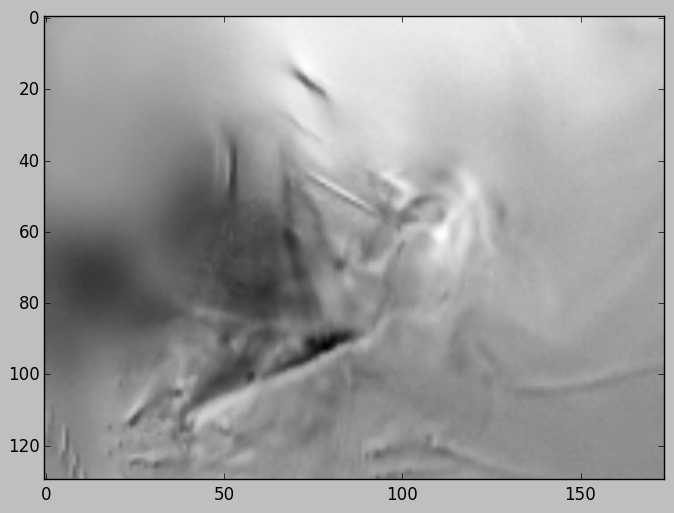

In [73]:
exp = swarm.flies[2].experiments.values()[0]
lwing = array(exp.exp_record['tiff_data']['axon_framebase']['Ph0'])[:30000]
rwing = array(exp.exp_record['tiff_data']['axon_framebase']['Ph1'])[:30000]
lmr = array(exp.exp_record['tiff_data']['axon_framebase']['Ph2'])[:30000]
imgs = array(exp.exp_record['tiff_data']['images'])[:30000]
fsig = array(exp.exp_record['tiff_data']['axon_framebase']['Ph3'])[:30000]
fmask = fsig<0.3
cdict = wing_correlations(rwing[fmask],imgs[fmask])
imshow(cdict['corr_img'],cmap = cm.gray)
display(gcf())

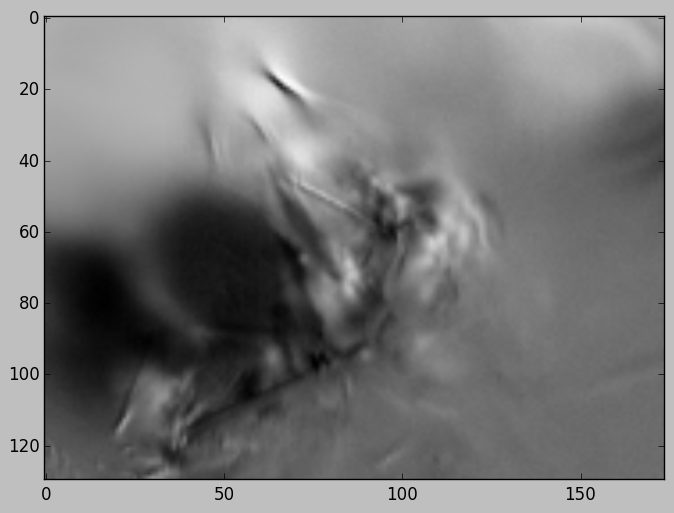

In [79]:
exp = swarm.flies[3].experiments.values()[0]
lwing = array(exp.exp_record['tiff_data']['axon_framebase']['Ph0'])[:30000]
rwing = array(exp.exp_record['tiff_data']['axon_framebase']['Ph1'])[:30000]
lmr = array(exp.exp_record['tiff_data']['axon_framebase']['Ph2'])[:30000]
imgs = array(exp.exp_record['tiff_data']['images'])[:30000]
fsig = array(exp.exp_record['tiff_data']['axon_framebase']['Ph3'])[:30000]
fmask = fsig<1.0
cdict = wing_correlations(rwing[fmask],imgs[fmask])
imshow(cdict['corr_img'],cmap = cm.gray)
display(gcf())